# The Gamma Function

A commonly occurring function in physics calculations is the gamma function $\Gamma(a)$, which is defined by the integral

$\Gamma(a) = \int_{0}^{\infty} x^{a-1}e^{-x}dx$.

There is no closed-form solution for the gamma function, but we can calculate its value for a given $a$ by performing the integral numerically.

## Part (a)

In the below program, I write a program to make a graph of the integrand $x^{a-1}e^{-x}$ as a function of x from x = 0 to x = 5, with three seperate plots a = 2, 3, 4 all on the same axes.

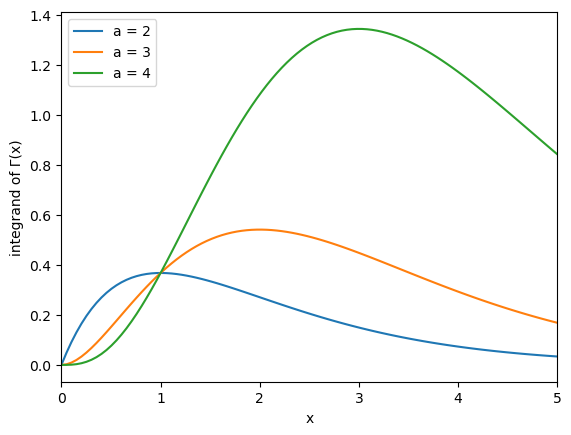

In [6]:
from pylab import plot,show,xlim,ylim,legend,xlabel,ylabel
import numpy as np
import math

def f(x,a):
    return ((x**(a-1))*math.exp(-x))

xlim(0,5)
x0 = np.linspace(0,5,100)
fx = np.vectorize(f)

plot(x0,fx(x0,2), label = 'a = 2')
plot(x0,fx(x0,3), label = 'a = 3')
plot(x0,fx(x0,4), label = 'a = 4')
xlabel('x')
ylabel('integrand of Γ(x)')
legend()
show()


The above plots all exhibit the same behavor: start at zero, rise to some maximum, then decay. If we take a closer look at the maxima, we may see that they all occur at x = a - 1.

## Part (b)

Since we are integrating from 0 to $\infty$, we are attempting to take a numerical integral over an infinite range, which involves an intfinite number of sample points. In order to actually solve this integral, we need to implement a change in variables that would make the integration range finite. A commonly used change in variables is 

$z = \frac{x}{c+x}$ or equivently $x = \frac{z}{c-z}$,

where $c$ is is any real number. Most of the area under the integrand falls under the maximum, so we may choose a value for $c$ that puts the peak of the variable change at $z = \frac{1}{2}$. The maximum for the integrand of the gamma function falls at $x = a-1$. So in order for the peak of the gamma function to occur at z = $\frac{1}{2}$ in our change of variables, $c = a-1$.

## Part (c)

Before we calculate the gamma function, we need to take another look at the integrand. The integrand we have here can be very difficult to evaluate because the factor $x^{a-1}$ can become very large and the factor $e^{-x}$ very small, which may cause numerical overflow and/or underflow for some values of x.

An alternate expression for the integrand is $e^{(a-1)*lnx-x}$. Although $(a-1)ln(x)-x$ does eventually blow up, the increase in $ln(x)$ and decrease in $-x$ as $x$ increases means that it will blow up at a less rapid rate than the original expression's counterparts. Also, since now the alternate expression is combined into one exponential function that grows rapidly for large $x$, the program won't suffer from data underflow, since no part of it becomes extremely small.

## Part (d)

Now, I can using the change of variables to write a function gamma(a) to calculate the gamma function for an arbitrary argument $a$. Below, I am testing the function for $a = \frac{3}{2}$, which is known to be equal to 

In [9]:
from gaussxw import gaussxw

def redef(z,a):
    ln = np.log    
    c = (a-1)/((a-1-z)**2)    #dx
    
    return c*(math.exp((a-1)*(ln(z/(a-1-z)))))*(math.exp((-z)/(a-1-z)))

def gamma(a):
    c = 0
    b = a-1
    N = 100
       
    x,w = gaussxw(N)
    xp = 0.5*(b-c)*x + 0.5*(b+c)
    wp = 0.5*(b-c)*w
    
    s = 0.0
    for k in range(N):
        s+= wp[k]*redef(xp[k],a)
        
    return s

print('Γ(3/2) is %s' % gamma(1.5))  

Γ(3/2) is 0.8862270268727523


 For an integer a, we can use the gamma function $\Gamma$(a) to calculate (a-1)! 

In [8]:
print('Γ(3) = 2! = %s' % gamma(3))
print('Γ(6) = 5! = %s' % gamma(6))
print('Γ(10) = 9! = %s' % gamma(10))

Γ(3) = 2! = 2.0
Γ(6) = 5! = 119.9999999999999
Γ(10) = 9! = 362880.0000001916
